# B3S5 Práctica de Gráficos, Correlación, ANOVA, RLS y RLM


### Carga de librerías

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Carga de datos

In [3]:
#Importar datos de Senado
# Carga de datos
#La ruta para los datos es: https://drive.google.com/file/d/1q05Sm7R8zUwoSVd3VOteCsvhl_nhnEPu/view?usp=sharing
df = pd.read_csv('C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Bloque 1 Instalacion y tipos de variables/datosSenado/IDEFC_jun2021.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44352 entries, 0 to 44351
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        44352 non-null  int64 
 1   INEGI       44352 non-null  int64 
 2   ENTIDAD     44352 non-null  object
 3   MODALIDAD   44352 non-null  object
 4   TIPO        44352 non-null  object
 5   SUBTIPO     44352 non-null  object
 6   ENERO       44352 non-null  int64 
 7   FEBRERO     44352 non-null  int64 
 8   MARZO       44352 non-null  int64 
 9   ABRIL       44352 non-null  int64 
 10  MAYO        44352 non-null  int64 
 11  JUNIO       44352 non-null  int64 
 12  JULIO       44352 non-null  int64 
 13  AGOSTO      44352 non-null  int64 
 14  SEPTIEMBRE  44352 non-null  int64 
 15  OCTUBRE     44352 non-null  int64 
 16  NOVIEMBRE   44352 non-null  int64 
 17  DICIEMBRE   44352 non-null  int64 
dtypes: int64(14), object(4)
memory usage: 6.1+ MB


In [4]:
df

,YEAR,INEGI,ENTIDAD,MODALIDAD,TIPO,SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,17,17,17,17,17,17,32,0,38,28,22,31
1,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,DA�O EN PROPIEDAD AJENA,DA�O EN PROPIEDAD AJENA,45,45,45,45,45,45,108,40,117,38,73,133
2,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,EXTORSION,EXTORSION,0,0,0,0,0,0,0,0,0,0,0,0
3,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,FRAUDE,FRAUDE,9,9,9,9,9,9,52,0,55,51,42,44
4,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44347,2017,32,ZACATECAS,DELITOS SEXUALES (VIOLACION),VIOLACION,VIOLACION,14,18,15,9,22,22,8,22,15,20,15,12
44348,2017,32,ZACATECAS,OTROS DELITOS,AMENAZAS,AMENAZAS,45,51,53,35,54,61,37,42,42,57,55,33
44349,2017,32,ZACATECAS,OTROS DELITOS,ESTUPRO,ESTUPRO,0,0,0,0,0,0,0,0,0,0,0,0
44350,2017,32,ZACATECAS,OTROS DELITOS,OTROS SEXUALES,OTROS SEXUALES,11,15,17,6,15,25,23,18,13,16,12,5


In [5]:
### Procesamiento de los datos
df2=df.loc[df['YEAR']==2012]
df2=df2.copy()
df2.drop(['YEAR','INEGI'],axis='columns', inplace=True)
df3=df2.groupby(['ENTIDAD','MODALIDAD']).sum()
df3.index = df3.index.set_names(['ENTIDAD','MODALIDAD'])
df3.reset_index(inplace=True)
df3 = df3.reset_index()
df4=pd.melt(df3, id_vars=['ENTIDAD','MODALIDAD'], value_vars=['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO',
                                                          'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE',
                                                          'DICIEMBRE'])
df4.drop('variable',axis='columns', inplace=True)
df5=df4.groupby(['ENTIDAD','MODALIDAD']).sum()
df5.index = df5.index.set_names(['ENTIDAD','MODALIDAD'])
df5.reset_index(inplace=True)
df6=df5.sort_values(by=['ENTIDAD']).pivot(index='ENTIDAD',columns='MODALIDAD',values='value')

In [6]:
df6

MODALIDAD,DELITOS PATRIMONIALES,DELITOS SEXUALES (VIOLACION),HOMICIDIOS,LESIONES,OTROS DELITOS,PRIV. DE LA LIBERTAD (SECUESTRO),ROBO COMUN,ROBO DE GANADO (ABIGEATO),ROBO EN CARRETERAS,ROBO EN INSTITUCIONES BANCARIAS
ENTIDAD,,,,,,,,,,
AGUASCALIENTES,4075,140,190,3874,4006,0,11478,136,34,4
BAJA CALIFORNIA,10175,633,789,10810,22959,30,63273,0,0,13
BAJA CALIFORNIA SUR,3509,143,82,1393,6588,0,9140,34,0,0
CAMPECHE,99,152,128,58,419,3,390,9,8,0
CHIAPAS,3332,754,1612,2519,7389,13,7075,276,125,0
CHIHUAHUA,10692,808,2479,3828,19809,53,22962,338,0,70
CIUDAD DE MEXICO,31578,843,1500,14499,41960,65,88646,0,0,55
COAHUILA,8909,207,1059,6011,10086,24,22033,219,92,2
COLIMA,657,126,379,532,4435,6,6316,15,46,6


In [7]:
df6.T

ENTIDAD,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MEXICO,COAHUILA,COLIMA,DURANGO,...,QUINTANA ROO,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS
MODALIDAD,,,,,,,,,,,,,,,,,,,,,
DELITOS PATRIMONIALES,4075,10175,3509,99,3332,10692,31578,8909,657,4875,...,7285,7071,5592,4724,6271,2597,679,15328,10003,2790
DELITOS SEXUALES (VIOLACION),140,633,143,152,754,808,843,207,126,189,...,446,335,177,354,503,556,34,752,338,129
HOMICIDIOS,190,789,82,128,1612,2479,1500,1059,379,924,...,639,588,1691,1029,529,1509,513,1921,218,342
LESIONES,3874,10810,1393,58,2519,3828,14499,6011,532,2502,...,4355,4662,3894,3211,7449,4832,1043,9633,5378,2101
OTROS DELITOS,4006,22959,6588,419,7389,19809,41960,10086,4435,7019,...,8307,10085,8278,11969,34729,10768,1071,21965,23795,2514
PRIV. DE LA LIBERTAD (SECUESTRO),0,30,0,3,13,53,65,24,6,50,...,16,25,35,6,58,123,3,91,0,16
ROBO COMUN,11478,63273,9140,390,7075,22962,88646,22033,6316,11597,...,14166,8307,14930,12827,15482,23620,3718,27224,6934,7808
ROBO DE GANADO (ABIGEATO),136,0,34,9,276,338,0,219,15,131,...,42,243,131,75,558,145,107,764,49,243
ROBO EN CARRETERAS,34,0,0,8,125,0,0,92,46,21,...,10,199,0,0,34,145,304,245,0,30


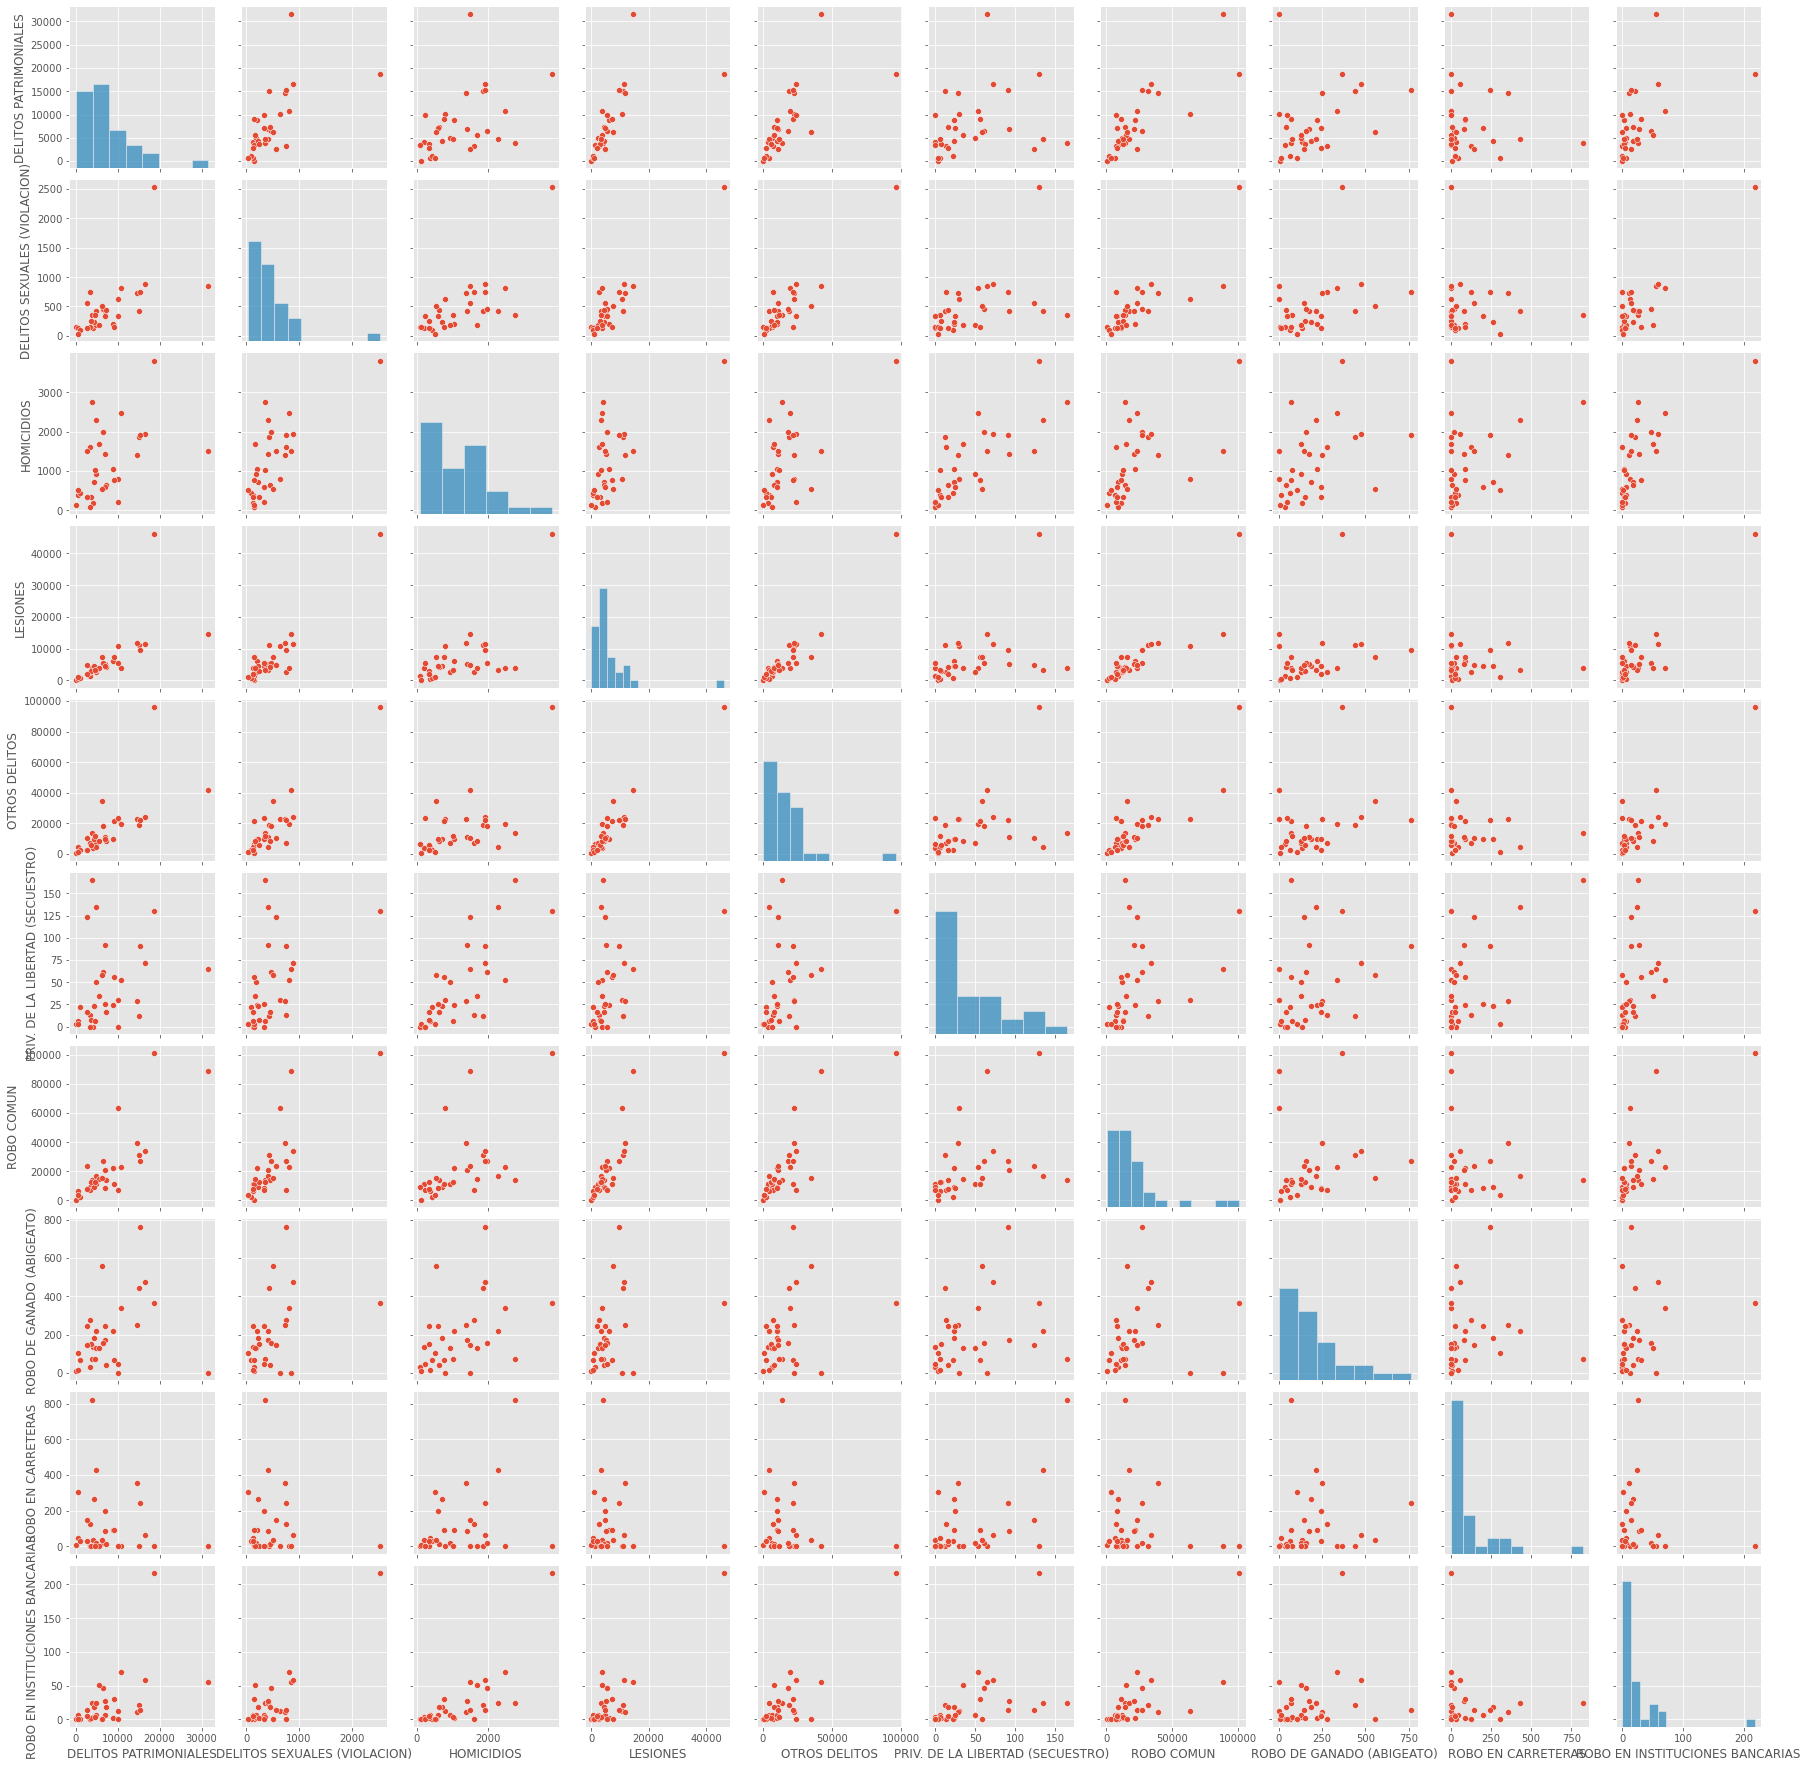

In [8]:
#Gráfico de parejas
sns.pairplot(df6)

In [9]:
# Matriz de correlación
corr_matrix=df6.corr()

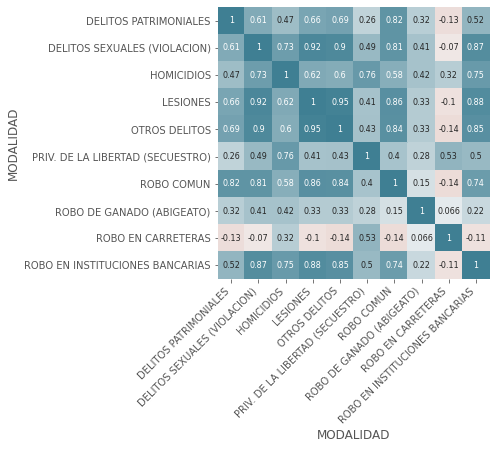

In [10]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [11]:
df6.columns

Index(['DELITOS PATRIMONIALES', 'DELITOS SEXUALES (VIOLACION)', 'HOMICIDIOS',
       'LESIONES', 'OTROS DELITOS', 'PRIV. DE LA LIBERTAD (SECUESTRO)',
       'ROBO COMUN', 'ROBO DE GANADO (ABIGEATO)', 'ROBO EN CARRETERAS',
       'ROBO EN INSTITUCIONES BANCARIAS'],
      dtype='object', name='MODALIDAD')

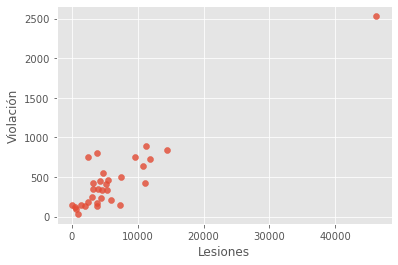

In [12]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df6['LESIONES'], y=df6['DELITOS SEXUALES (VIOLACION)'], alpha= 0.8)
ax.set_xlabel('Lesiones')
ax.set_ylabel('Violación');

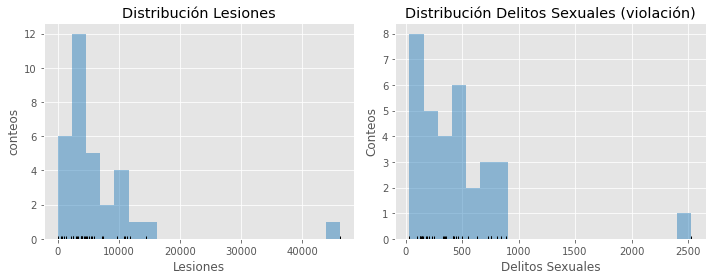

In [13]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=df6['LESIONES'], bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(df6['LESIONES'], np.full_like(df6['LESIONES'], -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución Lesiones')
axs[0].set_xlabel('Lesiones')
axs[0].set_ylabel('conteos')

axs[1].hist(x=df6['DELITOS SEXUALES (VIOLACION)'], bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(df6['DELITOS SEXUALES (VIOLACION)'], np.full_like(df6['DELITOS SEXUALES (VIOLACION)'], -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución Delitos Sexuales (violación)')
axs[1].set_xlabel('Delitos Sexuales')
axs[1].set_ylabel('Conteos')


plt.tight_layout();

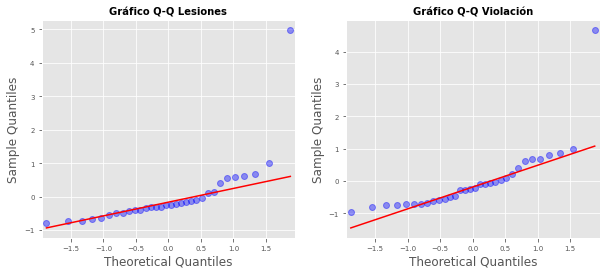

In [14]:
# Gráfico Q-Q
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    df6['LESIONES'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q Lesiones', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    df6['DELITOS SEXUALES (VIOLACION)'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q Violación', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

In [15]:
from scipy import stats
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', df6['LESIONES'].corr(df6['DELITOS SEXUALES (VIOLACION)'], method='pearson'))
print('Correlación spearman: ', df6['LESIONES'].corr(df6['DELITOS SEXUALES (VIOLACION)'], method='spearman'))
print('Correlación kendall: ', df6['LESIONES'].corr(df6['DELITOS SEXUALES (VIOLACION)'], method='kendall'))

Correlación Pearson:  0.9193846963001635
Correlación spearman:  0.6924486803519061
Correlación kendall:  0.5362903225806452


In [16]:

# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(df6['LESIONES'], df6['DELITOS SEXUALES (VIOLACION)'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(df6['LESIONES'],df6['DELITOS SEXUALES (VIOLACION)'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(df6['LESIONES'],df6['DELITOS SEXUALES (VIOLACION)'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.9193846963001636, p-value=1.0901955089812192e-13
Correlación Spearman: r=0.6924486803519061, p-value=1.1276010479101672e-05
Correlación Pearson: r=0.5362903225806452, p-value=6.113449467205653e-06


In [17]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(df6['LESIONES'])
print(f"Variable height: Estadístico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(df6['DELITOS SEXUALES (VIOLACION)'])
print(f"Variable weight: Estadístico = {k2}, p-value = {p_value}")

Variable height: Estadístico = 57.82672401224605, p-value = 2.7738720685858783e-13
Variable weight: Estadístico = 47.92610847601783, p-value = 3.917218301440435e-11


In [18]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', df6['LESIONES'].corr(df6['DELITOS SEXUALES (VIOLACION)'], method='pearson'))
print('Correlación spearman: ', df6['LESIONES'].corr(df6['DELITOS SEXUALES (VIOLACION)'], method='spearman'))
print('Correlación kendall: ', df6['LESIONES'].corr(df6['DELITOS SEXUALES (VIOLACION)'], method='kendall'))

Correlación Pearson:  0.9193846963001635
Correlación spearman:  0.6924486803519061
Correlación kendall:  0.5362903225806452


# Regresión Lineal Simple
Estudiaremos la relación entre los delitos de lesiones y los sexuales.


In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston # boston data set is part of sklearn
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# plt.style.use('ggplot') # emulate pretty r-style plots

In [20]:
df6.rename(columns = {'DELITOS SEXUALES (VIOLACION)':'VIOLACION'}, inplace = True)

In [21]:
df6

MODALIDAD,DELITOS PATRIMONIALES,VIOLACION,HOMICIDIOS,LESIONES,OTROS DELITOS,PRIV. DE LA LIBERTAD (SECUESTRO),ROBO COMUN,ROBO DE GANADO (ABIGEATO),ROBO EN CARRETERAS,ROBO EN INSTITUCIONES BANCARIAS
ENTIDAD,,,,,,,,,,
AGUASCALIENTES,4075,140,190,3874,4006,0,11478,136,34,4
BAJA CALIFORNIA,10175,633,789,10810,22959,30,63273,0,0,13
BAJA CALIFORNIA SUR,3509,143,82,1393,6588,0,9140,34,0,0
CAMPECHE,99,152,128,58,419,3,390,9,8,0
CHIAPAS,3332,754,1612,2519,7389,13,7075,276,125,0
CHIHUAHUA,10692,808,2479,3828,19809,53,22962,338,0,70
CIUDAD DE MEXICO,31578,843,1500,14499,41960,65,88646,0,0,55
COAHUILA,8909,207,1059,6011,10086,24,22033,219,92,2
COLIMA,657,126,379,532,4435,6,6316,15,46,6


In [22]:
lm_fit = smf.ols('LESIONES~VIOLACION', df6).fit()

In [23]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LESIONES   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     163.9
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.09e-13
Time:                        08:47:39   Log-Likelihood:                -303.07
No. Observations:                  32   AIC:                             610.1
Df Residuals:                      30   BIC:                             613.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1060.1616    820.528     -1.292      0.206   -2735.904     615.581
VIOLACION     16.5044      1.289     12.802      0.000      13.871      19.137
==============================================================================
Omnibus:                        8.119   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.171
Skew:                          -0.786   Prob(JB):                       0.0277
Kurtosis:                       4.705   Cond. No.                         911.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df6.columns

Index(['DELITOS PATRIMONIALES', 'VIOLACION', 'HOMICIDIOS', 'LESIONES',
       'OTROS DELITOS', 'PRIV. DE LA LIBERTAD (SECUESTRO)', 'ROBO COMUN',
       'ROBO DE GANADO (ABIGEATO)', 'ROBO EN CARRETERAS',
       'ROBO EN INSTITUCIONES BANCARIAS'],
      dtype='object', name='MODALIDAD')

In [25]:
df6.rename(columns = {'DELITOS PATRIMONIALES':'PATRIMONIALES'}, inplace = True)

In [26]:
lm_fit2 = smf.ols('LESIONES~PATRIMONIALES', df6).fit()

In [27]:
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LESIONES   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     22.80
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           4.40e-05
Time:                        08:47:40   Log-Likelihood:                -323.88
No. Observations:                  32   AIC:                             651.8
Df Residuals:                      30   BIC:                             654.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       219.7001   1706.424      0.129      0.898   -3265.283    3704.683
PATRIMONIALES     0.8127      0.170      4.775      0.000       0.465       1.160
==============================================================================
Omnibus:                       60.280   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.339
Skew:                           3.924   Prob(JB):                    1.40e-119
Kurtosis:                      21.679   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
predictors = pd.DataFrame({'VIOLACION':[10,10000,40000]})
predictions = lm_fit.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-895.117575,811.355177,-2552.125905,761.890754,-7722.682866,5932.447715
1,163983.882179,12318.683221,138825.774738,189141.989620,137968.495555,189999.268803
2,659116.013574,50985.575486,554989.577090,763242.450058,554779.132530,763452.894619


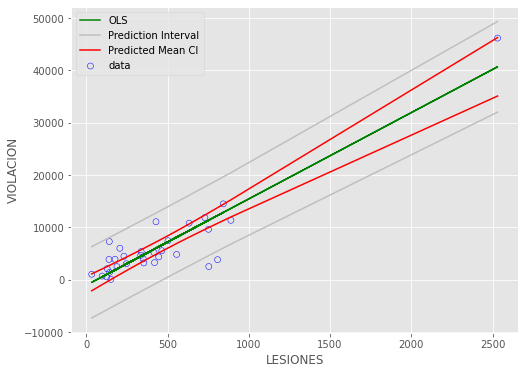

In [30]:
# Gráfico para los datos, los estimadores OLS, predicción e intervalos de confianza
fig, ax = plt.subplots(figsize=(8,6))

# get numpy array values from dataframe
x = df6.VIOLACION

# Plot the data
ax.scatter(x, df6.LESIONES, facecolors='none', edgecolors='b', label="data")
# plot the models fitted values
ax.plot(x, lm_fit.fittedvalues, 'g', label="OLS")

# To plot prediction and confidence intrvals we need predictions for all data points
predictions = lm_fit.get_prediction(df6['VIOLACION'].sort_values()).summary_frame(alpha=0.05)

# plot the high and low prediction intervals
ax.plot(x.sort_values(), predictions.obs_ci_lower, color='0.75', label="Prediction Interval")
ax.plot(x.sort_values(), predictions.obs_ci_upper, color='0.75', label="")

# plot the high and low mean confidence intervals
ax.plot(x.sort_values(), predictions.mean_ci_lower,color='r',label="Predicted Mean CI")
ax.plot(x.sort_values(), predictions.mean_ci_upper, color='r', label="")

ax.legend(loc='best');

plt.xlabel('LESIONES');
plt.ylabel('VIOLACION');